# ACERCAMIENTO A LA ANALITICA DE DATOS PARA CREAR NUEVAS CAMPAÑAS

## JUAN PABLO MONTOYA VALLEJO
¡Bienvenido a este notebook en el que se hace un acercamiento a la analítica de datos para proponer ideas de nuevas campañas!

En este notebook, exploraremos cómo la analítica de datos puede ser utilizada para comprender mejor los gustos y preferencias de los clientes potenciales y cómo podemos usar esa información para enfocar las futuras campañas de marketing de la empresa.

En este notebook, exploraremos diferentes técnicas y herramientas de analítica de datos para identificar los productos en los que deberíamos enfocar nuestras futuras campañas de marketing. Comenzaremos por explorar los datos y luego utilizaremos técnicas de minería de datos para descubrir patrones y tendencias en los datos. También cómo utilizar la visualización de datos para comunicar hallazgos de manera efectiva.

In [23]:
import pandas_gbq
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
import pickle
import h5py
warnings.filterwarnings("ignore")

In [24]:
with open('../../app/SQL/Query_traer_clientes_simplificado.sql') as file:
    query=file.read()
data=pandas_gbq.read_gbq(query, project_id='customer-experience-384423',progress_bar_type=None)

In [25]:
data.describe()

,id_cliente,promedio_compra,cantidad_compras,dropsize,contactable,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,...,compras_2019,compras_2020,compras_2021,recencia_1_3_meses,recencia_3_6_meses,recencia_6_9_meses,recencia_9_12_meses,recencia_1_o_mas_anos,gasto_sede_fisica,gasto_sede_online
count,250209.0,2.502090e+05,250209.0,250209.000000,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,...,1.600100e+04,4.145100e+04,1.229280e+05,130964.0,130964.0,130964.0,130964.0,130964.0,2.211740e+05,3.768100e+04
mean,125105.999996,8.160004e+04,8.379611,14670.555991,0.579476,0.0,0.0,0.0,0.846197,0.0,...,6.801734e+05,8.330051e+05,8.853949e+05,0.150591,0.203331,0.147338,0.065453,0.433287,9.326122e+05,1.303451e+06
std,72229.261096,6.437596e+04,29.776725,8610.990040,0.493644,0.0,0.0,0.0,0.360761,0.0,...,3.536511e+06,2.496913e+06,3.520044e+06,0.357651,0.402478,0.354444,0.247325,0.495531,3.920149e+06,4.980220e+06
min,1.0,-4.644237e+05,2.0,-175252.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.480640e+05,-1.470538e+06,-4.272698e+07,0.0,0.0,0.0,0.0,0.0,-4.272698e+07,-1.330546e+06
25%,62554.0,4.266033e+04,2.0,8611.333333,0.0,0.0,0.0,0.0,1.0,0.0,...,9.398400e+04,9.894700e+04,1.090760e+05,0.0,0.0,0.0,0.0,0.0,1.115840e+05,1.198000e+05
50%,125106.0,6.427800e+04,4.0,13504.250000,1.0,0.0,0.0,0.0,1.0,0.0,...,2.312620e+05,2.852080e+05,3.046380e+05,0.0,0.0,0.0,0.0,0.0,3.060930e+05,4.268240e+05
75%,187658.0,1.008320e+05,10.0,19156.500000,1.0,0.0,0.0,0.0,1.0,0.0,...,6.049400e+05,8.075810e+05,8.066160e+05,0.0,0.0,0.0,0.0,1.0,8.158685e+05,1.278138e+06
max,250210.0,2.212655e+06,13606.0,245661.500000,1.0,0.0,0.0,0.0,1.0,0.0,...,3.811134e+08,2.503512e+08,6.453132e+08,1.0,1.0,1.0,1.0,1.0,1.276596e+09,3.851241e+08


## CLIENTES INSATISFECHOS POR ZONA

Verificar la cantidad de clientes cuyo promedio de compras es negativo en un período es importante para una la industria textil para:

1. Identificar problemas en la satisfacción del cliente 
2. problemas de calidad
3. servicio al cliente deficiente
4. incumplimiento de expectativas

Verificar esta situación ayudaría a identificar los problemas específicos y tomar medidas para mejorar la satisfacción del cliente.

Tambien sirve para evaluar la salud financiera de la empresa y tomar decisiones informadas sobre estrategias de marketing y retención de clientes

Se encontraron personas de este grupo que son contactables y se les deberia hacer un seguimiento para mejorar la satisfación de los clientes

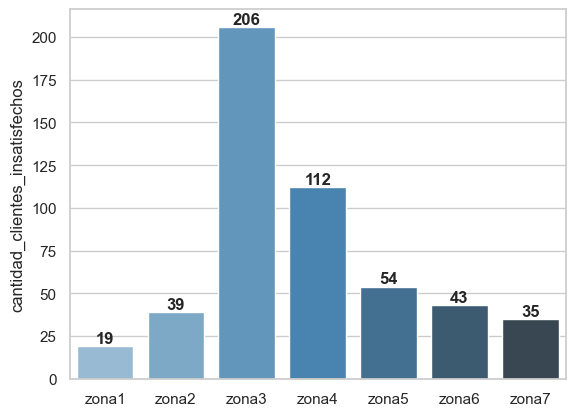

In [26]:
data_promedio_negativo = data[data['promedio_compra'] < 0]
devoluciones={}
devoluciones['zona1']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_1']==1])
devoluciones['zona2']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_2']==1])
devoluciones['zona3']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_3']==1])
devoluciones['zona4']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_4']==1])
devoluciones['zona5']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_5']==1])
devoluciones['zona6']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_6']==1])
devoluciones['zona7']=len(data_promedio_negativo[data_promedio_negativo['compro_en_ZONA_7']==1])
df_devoluciones=pd.DataFrame.from_dict(devoluciones, orient='index',columns=['cantidad_clientes_insatisfechos'])
sns.set(style="whitegrid")
ax = sns.barplot(x=df_devoluciones.index, y="cantidad_clientes_insatisfechos", data=df_devoluciones, palette="Blues_d")
for i, v in enumerate(df_devoluciones["cantidad_clientes_insatisfechos"]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontweight='bold')
plt.show()

In [27]:
clientes_insatisfechos_contactables=len(data[(data['promedio_compra'] < 0)& (data['contactable'] > 0)])
print(f'los clientes insatisfechos contactables son {clientes_insatisfechos_contactables}')

los clientes insatisfechos contactables son 243


## CANTIDAD DE CLIENTES POR ZONA QUE HAN AUMENTADO SUS COMPRAS EN 2021 CON RESPECTO A 2020


Verificar la cantidad de clientes que han aumentado sus compras con respecto al período anterior es importante para la industria textil para:

1. Evaluar el crecimiento y éxito del negocio 
2. satisfacción del cliente
3. objetivos de crecimiento
4. nuevas oportunidades de negocio para aplicar nuevas campañas
5. requerir recursos y capacidades adicionales para satisfacer la demanda



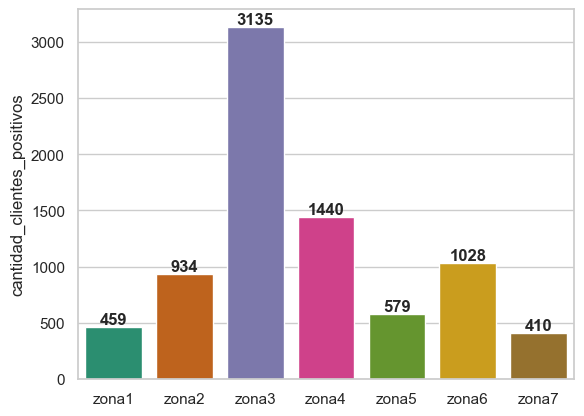

In [28]:
data['aumento_compras'] = data['compras_2021'] - data['compras_2020']
data_aumento_positivo = data[data['aumento_compras'] > 0]
aumento_positivo_clientes={}
aumento_positivo_clientes['zona1']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_1']==1])
aumento_positivo_clientes['zona2']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_2']==1])
aumento_positivo_clientes['zona3']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_3']==1])
aumento_positivo_clientes['zona4']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_4']==1])
aumento_positivo_clientes['zona5']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_5']==1])
aumento_positivo_clientes['zona6']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_6']==1])
aumento_positivo_clientes['zona7']=len(data_aumento_positivo[data_aumento_positivo['compro_en_ZONA_7']==1])
df_aumento=pd.DataFrame.from_dict(aumento_positivo_clientes, orient='index',columns=['cantidad_clientes_positivos'])
sns.set(style="whitegrid")
ax = sns.barplot(x=df_aumento.index, y="cantidad_clientes_positivos", data=df_aumento, palette="Dark2")
for i, v in enumerate(df_aumento["cantidad_clientes_positivos"]):
    ax.annotate(str(v), xy=(i, v), ha='center', va='bottom', fontweight='bold')
plt.show()

## Cantidad de personas que han aumentado sus ventas  y que son contactables

In [29]:
clientes_positivos_contactables=len(data_aumento_positivo['contactable']==1)
print(f'La empresa tiene a su disposicion {clientes_positivos_contactables} clientes contables que aumentaron sus compras con respecto al periodo anterior')

La empresa tiene a su disposicion 6391 clientes contables que aumentaron sus compras con respecto al periodo anterior


In [30]:
data_aumento_positivo_contactable=data_aumento_positivo[data_aumento_positivo['contactable']==1]

In [31]:
lista_zonas=['compro_en_ZONA_1','compro_en_ZONA_2','compro_en_ZONA_3','compro_en_ZONA_4','compro_en_ZONA_5','compro_en_ZONA_6','compro_en_ZONA_7']
lista_productos=['ELEFANTES','PELUCHES','CALCETINES','PELUCHE','BOLSO','CARTUCHERA','BILLETERA','FUNKOS','SALIDA_DE_BANO','GAFAS','SET_DE_ALIMENTACION','JUGUETERIA','CARTERA','MALETA_VIAJERA','TENIS_CON_RUEDAS','SET_DE_BELLEZA','SUECOS','MORRAL','PANTUFLAS','PARAGUAS','LONCHERA','SANDALIAS','BOTAS','BONO','MALETA_CON_RUEDAS','SET_ESCOLAR','GORRAS','GORRO','COBIJA','BABERO','TENIS','BALETA','ZAPATOS','TENIS_CON_LUCES','CORREAS','AROMAS','POP','BOLSA','RELOJ','MOCHILA','ESTUCHES','PANALERA','DULCES','CAMISETA','SET','STICKERS','PANTALON','ACCESORIOS']

cantidad_compras_zona = pd.DataFrame(columns=lista_zonas, index=lista_productos)

for zona in lista_zonas:
    for producto in lista_productos:
        cantidad = ((data_aumento_positivo_contactable[producto] > 0) & (data_aumento_positivo_contactable[zona] > 0)).sum()
        cantidad_compras_zona[zona][producto] = cantidad
conclusion_final=cantidad_compras_zona.loc[~(cantidad_compras_zona == 0).all(axis=1)]
conclusion_final

,compro_en_ZONA_1,compro_en_ZONA_2,compro_en_ZONA_3,compro_en_ZONA_4,compro_en_ZONA_5,compro_en_ZONA_6,compro_en_ZONA_7
PELUCHES,15,13,40,31,3,23,13
CALCETINES,8,37,74,45,15,12,30
PELUCHE,0,0,0,0,0,1,1
GAFAS,19,20,123,63,20,34,26
SUECOS,11,22,80,40,7,31,20
MORRAL,1,2,6,10,3,2,1
PANTUFLAS,9,15,40,22,5,11,12
LONCHERA,5,6,12,6,2,6,1
SANDALIAS,34,64,186,109,19,76,39
BOTAS,0,1,2,1,0,0,0


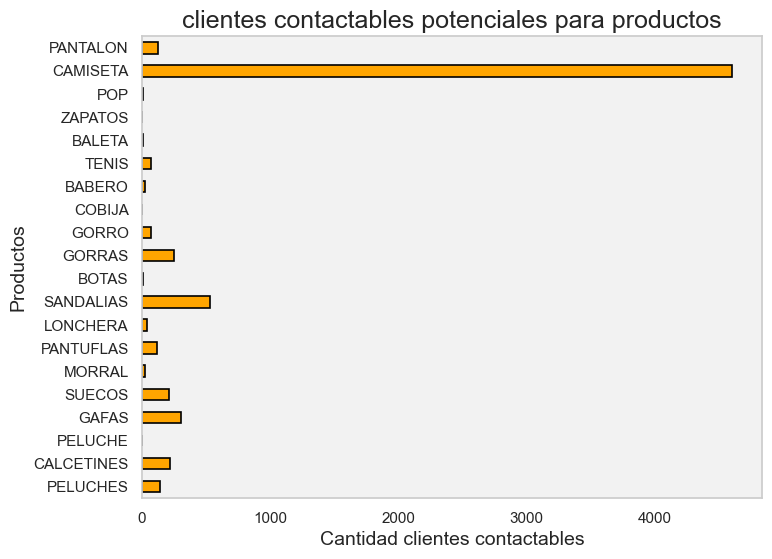

In [32]:
total_clientes_productos=conclusion_final.sum(axis=1)
fig, ax = plt.subplots()


grafico = total_clientes_productos.plot(kind='barh', color='orange', edgecolor='black', linewidth=1.2, figsize=(8, 6))
grafico.set_facecolor('#F2F2F2')
grafico.grid(False)
grafico.set_title('clientes contactables potenciales para productos', fontsize=18)
grafico.set_xlabel('Cantidad clientes contactables', fontsize=14)
grafico.set_ylabel('Productos', fontsize=14)
plt.show()

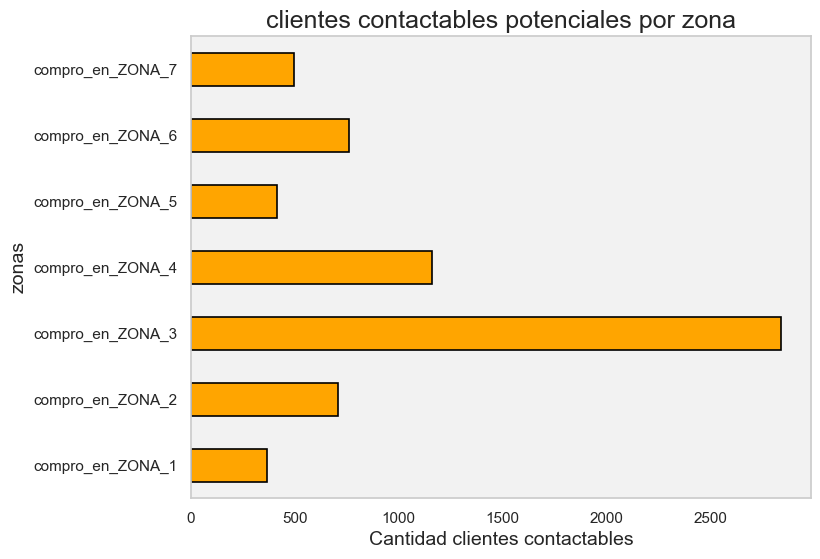

In [33]:
total_clientes_zonas=conclusion_final.sum(axis=0)
grafico = total_clientes_zonas.plot(kind='barh', color='orange', edgecolor='black', linewidth=1.2, figsize=(8, 6))
grafico.set_facecolor('#F2F2F2')
grafico.grid(False)
grafico.set_title('clientes contactables potenciales por zona', fontsize=18)
grafico.set_xlabel('Cantidad clientes contactables', fontsize=14)
grafico.set_ylabel('zonas', fontsize=14)
plt.show()

## CONCLUSION

Después de analizar los datos de los clientes contactables que tuvieron un aumento en las compras en 2021 en comparación con 2020, se identificó que la zona con más clientes que cumplen con estas características fue la zona 3. Además, se observó que a estos clientes en particular les gusta comprar productos como camisetas, sandalias, gafas, calcetines y gorras.

En general, el top 3 de productos más populares entre estos clientes en todas las zonas son camisetas, sandalias y gafas.

Con base a esta información, se propone implementar campañas publicitarias en las zonas 3 y 4, promocionando específicamente los productos de camisetas, sandalias y gafas. Esto permitirá aprovechar el interés y la preferencia de compra de estos clientes en estas zonas en particular, con el objetivo de aumentar las ventas y la participación del mercado en esas áreas.

Tambien es importante contactar a las personas que tienen al dia el habeas data, que no estan en la blacklist, que tienen el correo y telefono disponibles y  que no estan satisfechas con los productos que en su mayoria tambien pertenecen a esas zonas y logran entender como se puede mejorar la satisfaccion de los clientes.

Es importante llevar a cabo un análisis continuo de los resultados de estas campañas para evaluar su efectividad y realizar ajustes si es necesario.